# Exploratory Data Analysis - Food Delivery Times

This notebook explores the food delivery dataset to understand patterns, outliers, and relationships that will inform our modeling approach.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Overview

In [5]:
# Load the dataset
df = pd.read_csv('../data/Food_Delivery_Times.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (1000, 9)

Column Names:
['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

First few rows:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
# Basic info about the dataset
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe()

Data Types:
Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

Missing Values:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

Basic Statistics:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


## 2. Target Variable Analysis

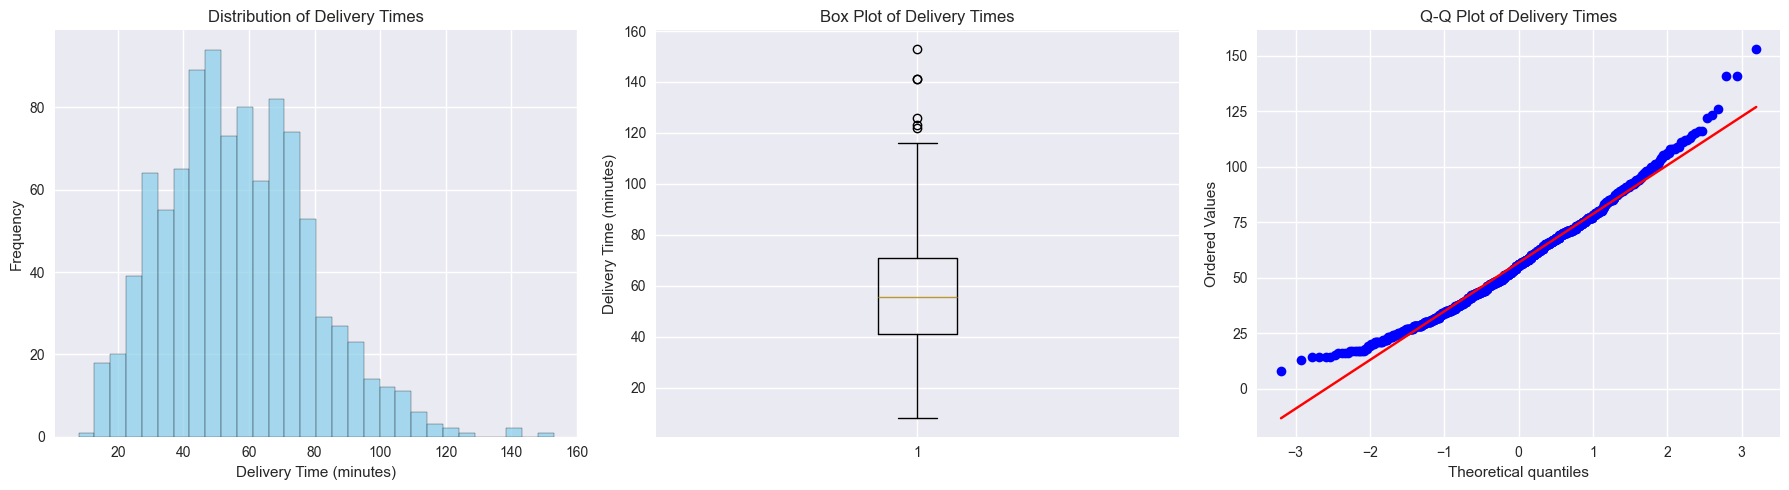

Mean delivery time: 56.73 minutes
Median delivery time: 55.50 minutes
Standard deviation: 22.07 minutes
Min delivery time: 8.00 minutes
Max delivery time: 153.00 minutes


In [8]:
# Distribution of delivery times
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['Delivery_Time_min'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Delivery Times')
axes[0].set_xlabel('Delivery Time (minutes)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df['Delivery_Time_min'])
axes[1].set_title('Box Plot of Delivery Times')
axes[1].set_ylabel('Delivery Time (minutes)')

# Q-Q plot
from scipy import stats
stats.probplot(df['Delivery_Time_min'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Delivery Times')

plt.tight_layout()
plt.show()

print(f"Mean delivery time: {df['Delivery_Time_min'].mean():.2f} minutes")
print(f"Median delivery time: {df['Delivery_Time_min'].median():.2f} minutes")
print(f"Standard deviation: {df['Delivery_Time_min'].std():.2f} minutes")
print(f"Min delivery time: {df['Delivery_Time_min'].min():.2f} minutes")
print(f"Max delivery time: {df['Delivery_Time_min'].max():.2f} minutes")

## 3. Feature Analysis

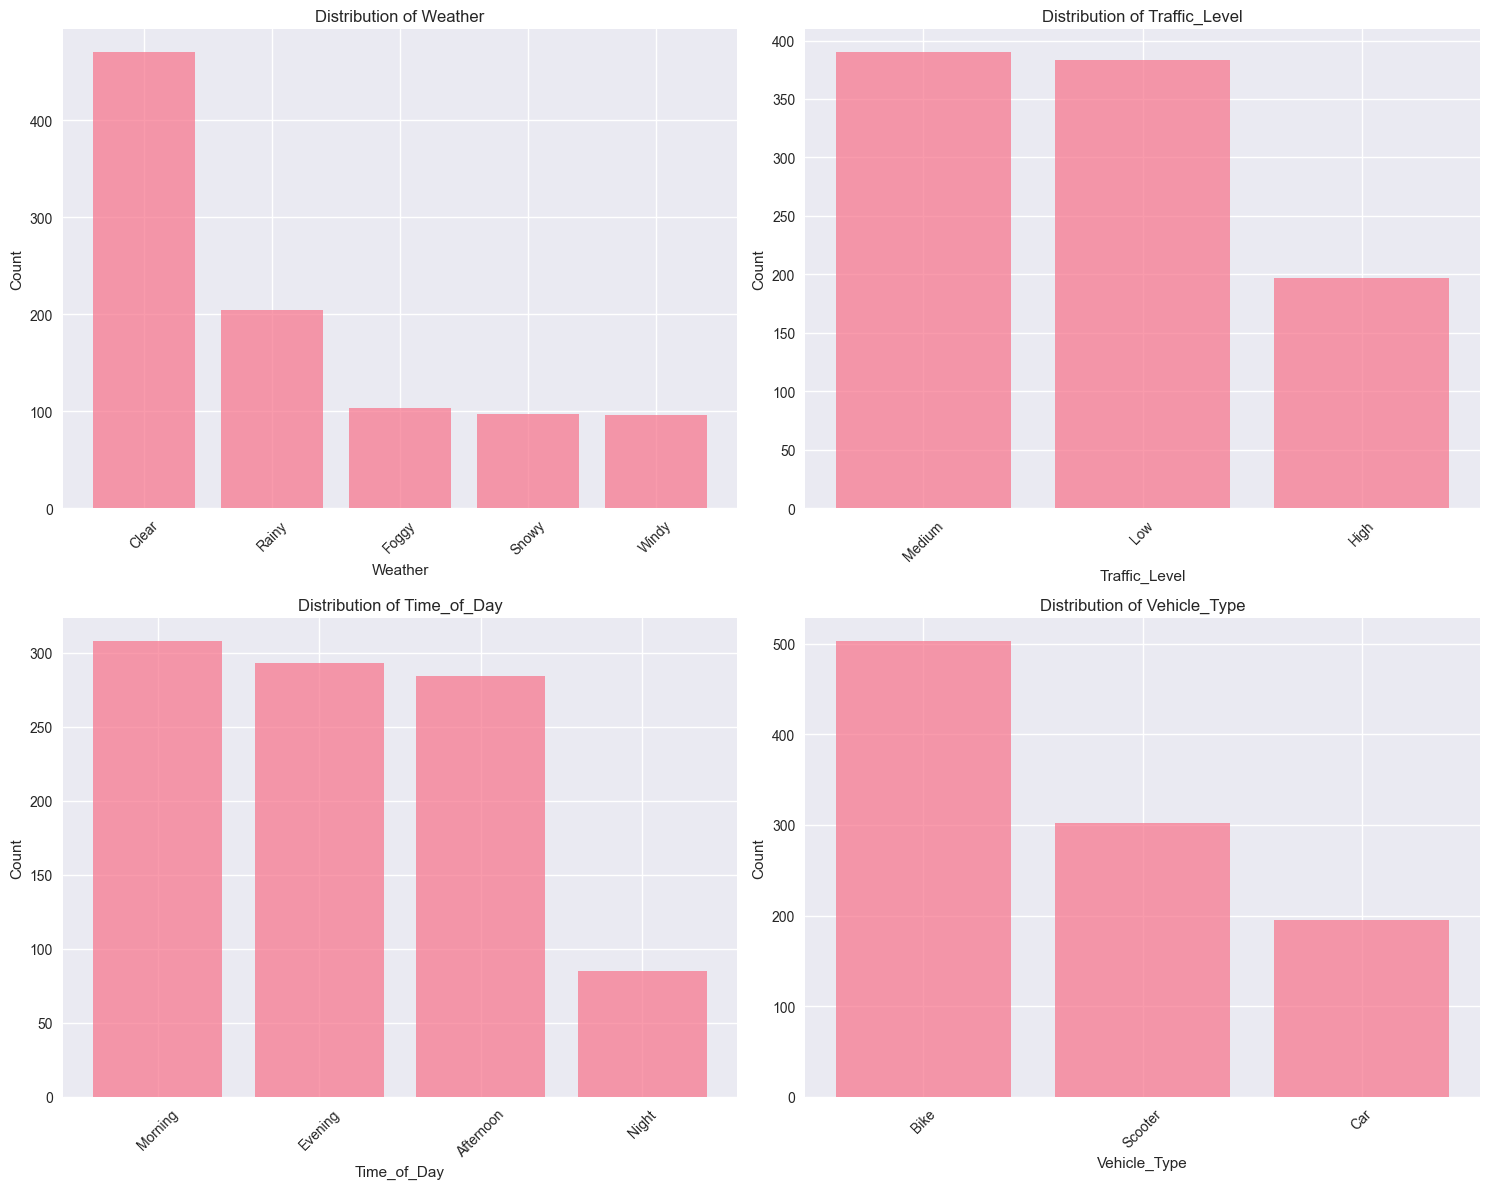

In [9]:
# Categorical features analysis
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        # Value counts
        counts = df[feature].value_counts()
        axes[i].bar(counts.index, counts.values, alpha=0.7)
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

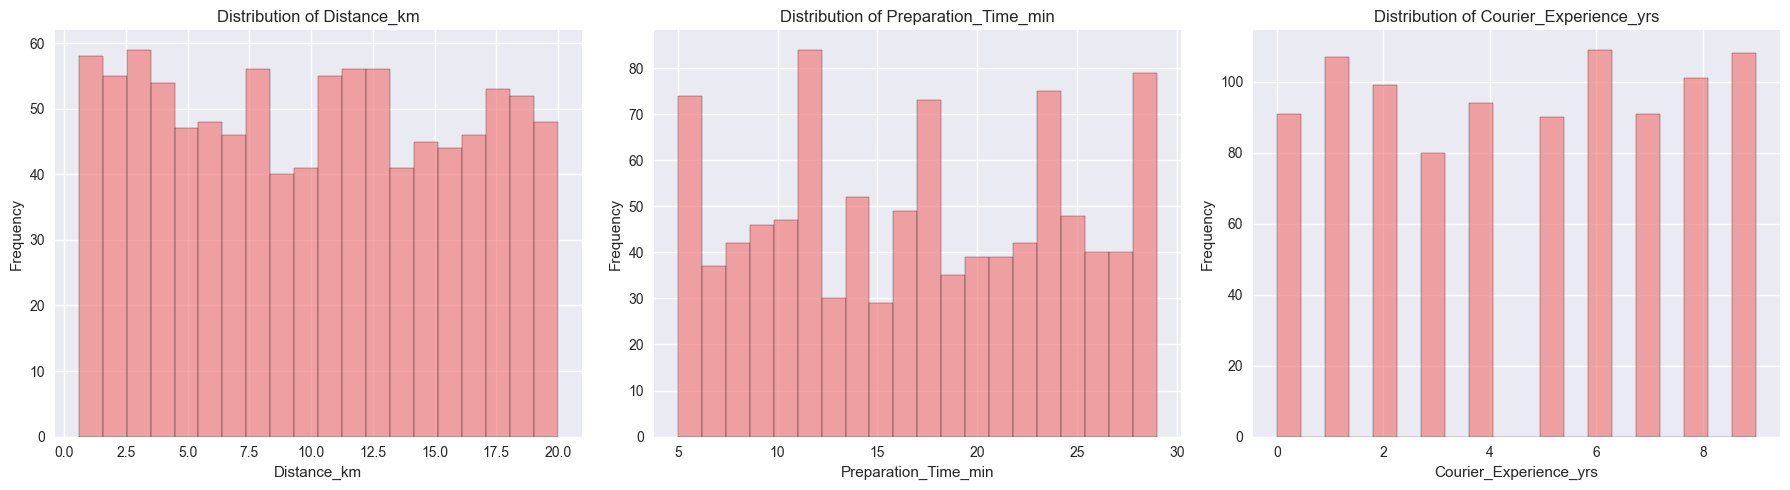

In [10]:
# Numerical features analysis
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numerical_features):
    if feature in df.columns:
        axes[i].hist(df[feature], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

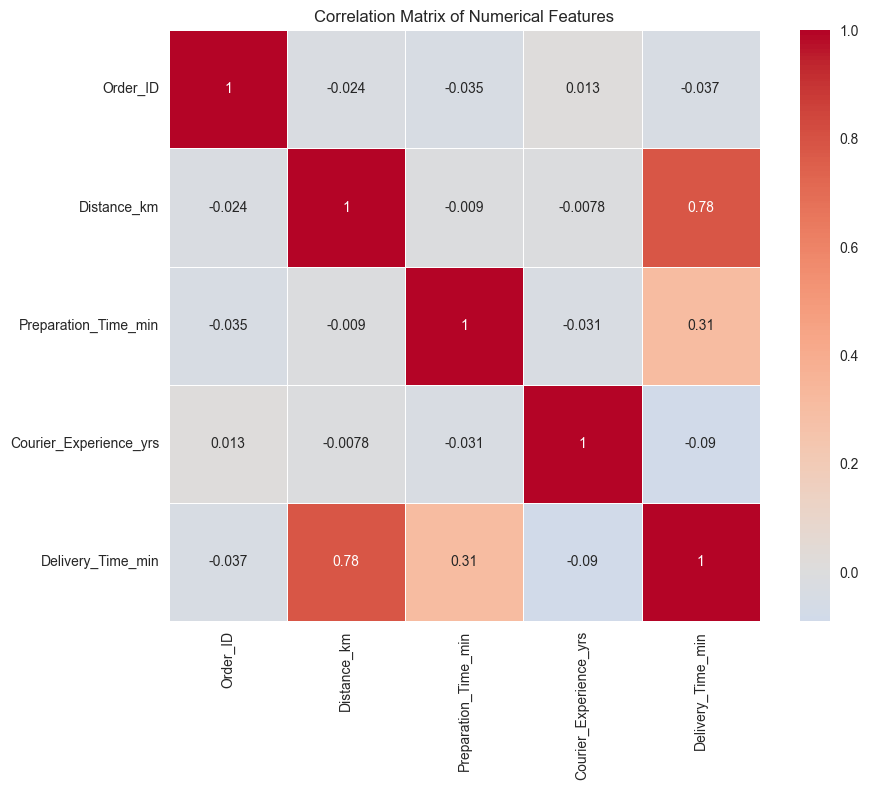

Correlations with Delivery Time:
Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.090433
Order_ID                 -0.036650
Name: Delivery_Time_min, dtype: float64


In [11]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Strongest correlations with delivery time
delivery_corr = correlation_matrix['Delivery_Time_min'].sort_values(key=abs, ascending=False)
print("Correlations with Delivery Time:")
print(delivery_corr)

## 5. Feature Relationships with Target

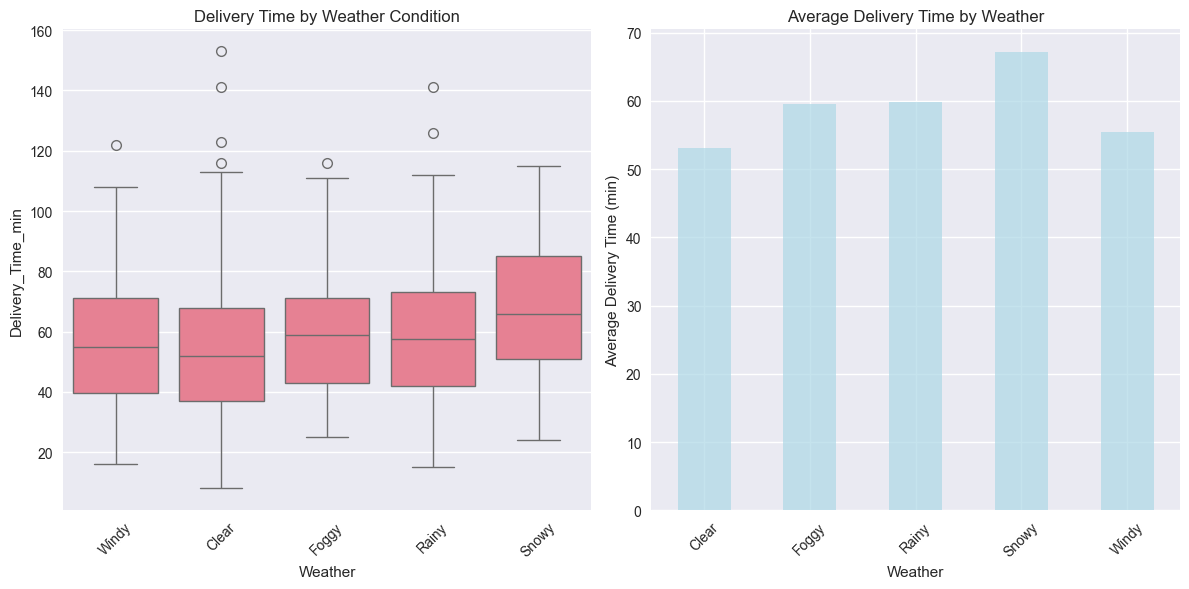

Weather Impact on Delivery Time:
              mean        std  count
Weather                             
Clear    53.082979  21.272211    470
Foggy    59.466019  20.862207    103
Rainy    59.794118  22.822441    204
Snowy    67.113402  21.291565     97
Windy    55.458333  21.777785     96


In [12]:
# Weather vs Delivery Time
if 'Weather' in df.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Weather', y='Delivery_Time_min')
    plt.title('Delivery Time by Weather Condition')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    weather_stats = df.groupby('Weather')['Delivery_Time_min'].agg(['mean', 'std', 'count'])
    weather_stats['mean'].plot(kind='bar', alpha=0.7, color='lightblue')
    plt.title('Average Delivery Time by Weather')
    plt.ylabel('Average Delivery Time (min)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Weather Impact on Delivery Time:")
    print(weather_stats)

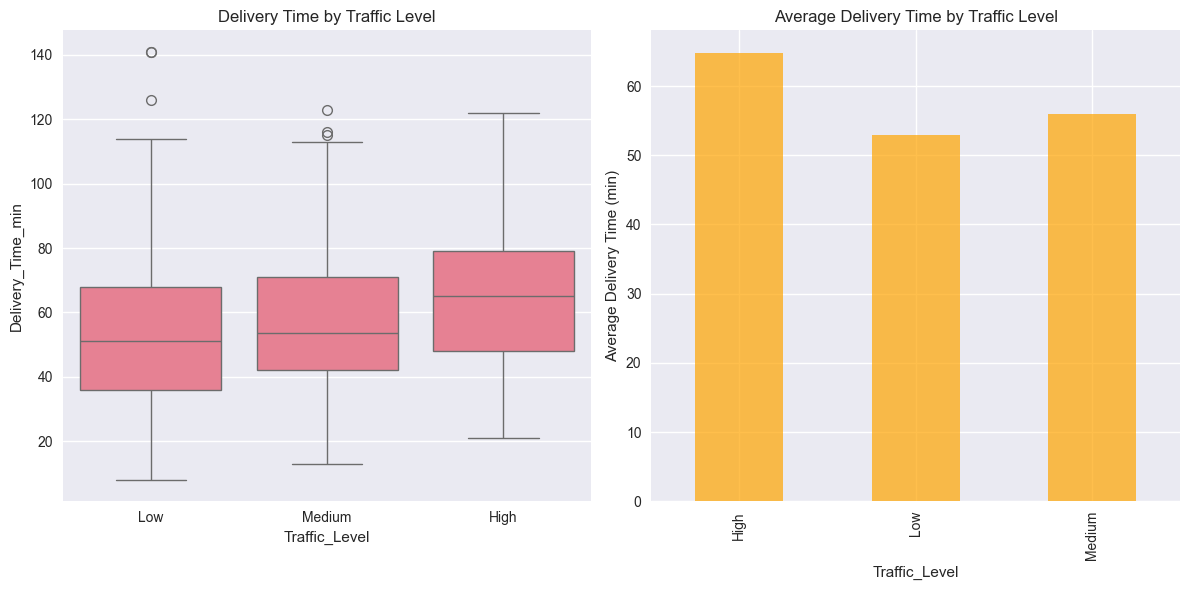

Traffic Impact on Delivery Time:
                    mean        std  count
Traffic_Level                             
High           64.807107  21.869356    197
Low            52.885117  21.683646    383
Medium         56.020513  21.186516    390


In [13]:
# Traffic Level vs Delivery Time
if 'Traffic_Level' in df.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min')
    plt.title('Delivery Time by Traffic Level')
    
    plt.subplot(1, 2, 2)
    traffic_stats = df.groupby('Traffic_Level')['Delivery_Time_min'].agg(['mean', 'std', 'count'])
    traffic_stats['mean'].plot(kind='bar', alpha=0.7, color='orange')
    plt.title('Average Delivery Time by Traffic Level')
    plt.ylabel('Average Delivery Time (min)')
    
    plt.tight_layout()
    plt.show()
    
    print("Traffic Impact on Delivery Time:")
    print(traffic_stats)

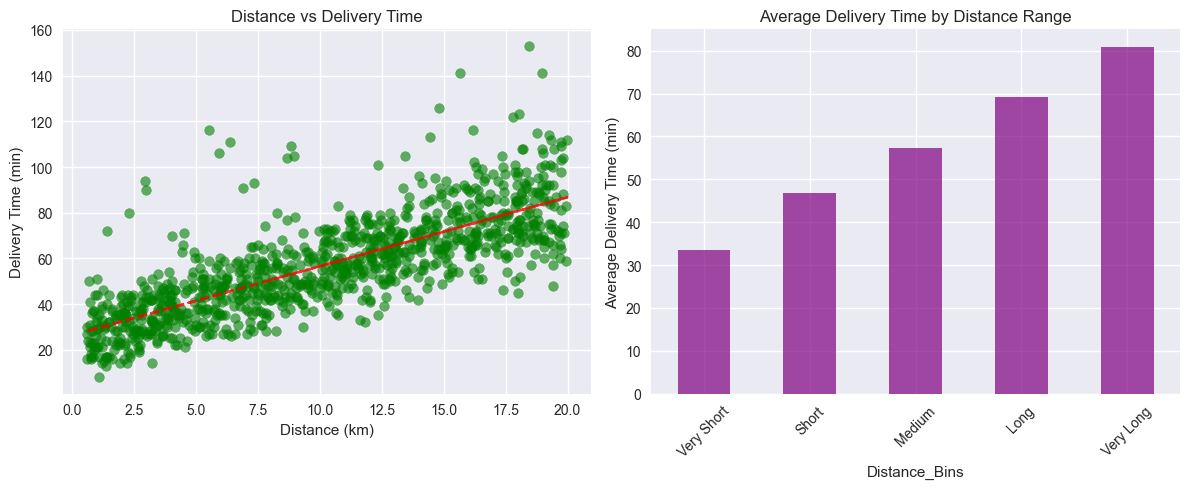

In [14]:
# Distance vs Delivery Time scatter plot
if 'Distance_km' in df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(df['Distance_km'], df['Delivery_Time_min'], alpha=0.6, color='green')
    plt.xlabel('Distance (km)')
    plt.ylabel('Delivery Time (min)')
    plt.title('Distance vs Delivery Time')
    
    # Add trend line
    z = np.polyfit(df['Distance_km'], df['Delivery_Time_min'], 1)
    p = np.poly1d(z)
    plt.plot(df['Distance_km'], p(df['Distance_km']), "r--", alpha=0.8)
    
    plt.subplot(1, 2, 2)
    # Distance bins analysis
    df['Distance_Bins'] = pd.cut(df['Distance_km'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
    distance_stats = df.groupby('Distance_Bins')['Delivery_Time_min'].mean()
    distance_stats.plot(kind='bar', alpha=0.7, color='purple')
    plt.title('Average Delivery Time by Distance Range')
    plt.ylabel('Average Delivery Time (min)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## 6. Outlier Detection

In [15]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in key numerical columns
outlier_features = ['Delivery_Time_min', 'Distance_km', 'Preparation_Time_min']

for feature in outlier_features:
    if feature in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, feature)
        print(f"\n{feature} Outliers:")
        print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        print(f"Bounds: [{lower:.2f}, {upper:.2f}]")
        
        if len(outliers) > 0:
            print(f"Outlier range: {outliers[feature].min():.2f} - {outliers[feature].max():.2f}")


Delivery_Time_min Outliers:
Number of outliers: 6 (0.60%)
Bounds: [-4.00, 116.00]
Outlier range: 122.00 - 153.00

Distance_km Outliers:
Number of outliers: 0 (0.00%)
Bounds: [-9.76, 29.89]

Preparation_Time_min Outliers:
Number of outliers: 0 (0.00%)
Bounds: [-7.00, 41.00]


## 7. Time and Vehicle Analysis

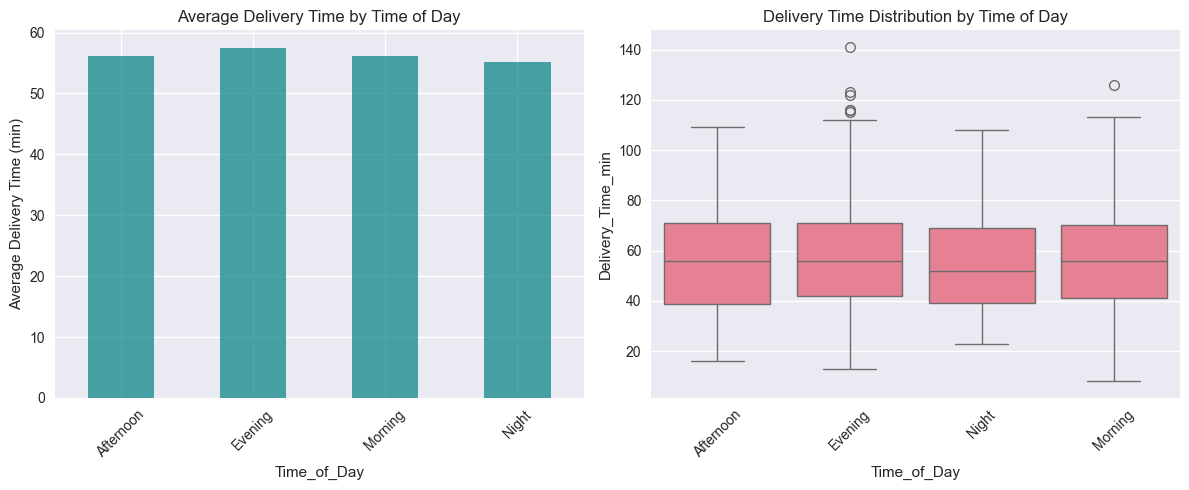

Time of Day Analysis:
                  mean        std  count
Time_of_Day                             
Afternoon    56.080986  21.085987    284
Evening      57.481229  22.176375    293
Morning      56.120130  21.539643    308
Night        55.211765  21.426560     85


In [16]:
# Time of day analysis
if 'Time_of_Day' in df.columns:
    time_analysis = df.groupby('Time_of_Day')['Delivery_Time_min'].agg(['mean', 'std', 'count'])
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    time_analysis['mean'].plot(kind='bar', alpha=0.7, color='teal')
    plt.title('Average Delivery Time by Time of Day')
    plt.ylabel('Average Delivery Time (min)')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min')
    plt.title('Delivery Time Distribution by Time of Day')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Time of Day Analysis:")
    print(time_analysis)

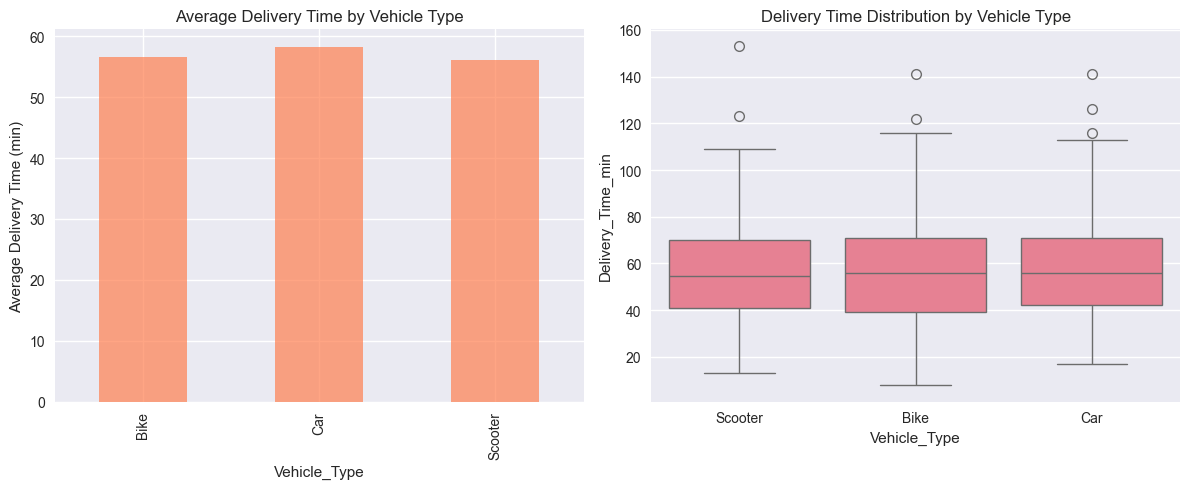

Vehicle Type Analysis:
                   mean        std  count
Vehicle_Type                             
Bike          56.574553  22.190544    503
Car           58.200000  22.521376    195
Scooter       56.046358  21.602675    302


In [17]:
# Vehicle type analysis
if 'Vehicle_Type' in df.columns:
    vehicle_analysis = df.groupby('Vehicle_Type')['Delivery_Time_min'].agg(['mean', 'std', 'count'])
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    vehicle_analysis['mean'].plot(kind='bar', alpha=0.7, color='coral')
    plt.title('Average Delivery Time by Vehicle Type')
    plt.ylabel('Average Delivery Time (min)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Vehicle_Type', y='Delivery_Time_min')
    plt.title('Delivery Time Distribution by Vehicle Type')
    
    plt.tight_layout()
    plt.show()
    
    print("Vehicle Type Analysis:")
    print(vehicle_analysis)

## 8. Multi-dimensional Analysis

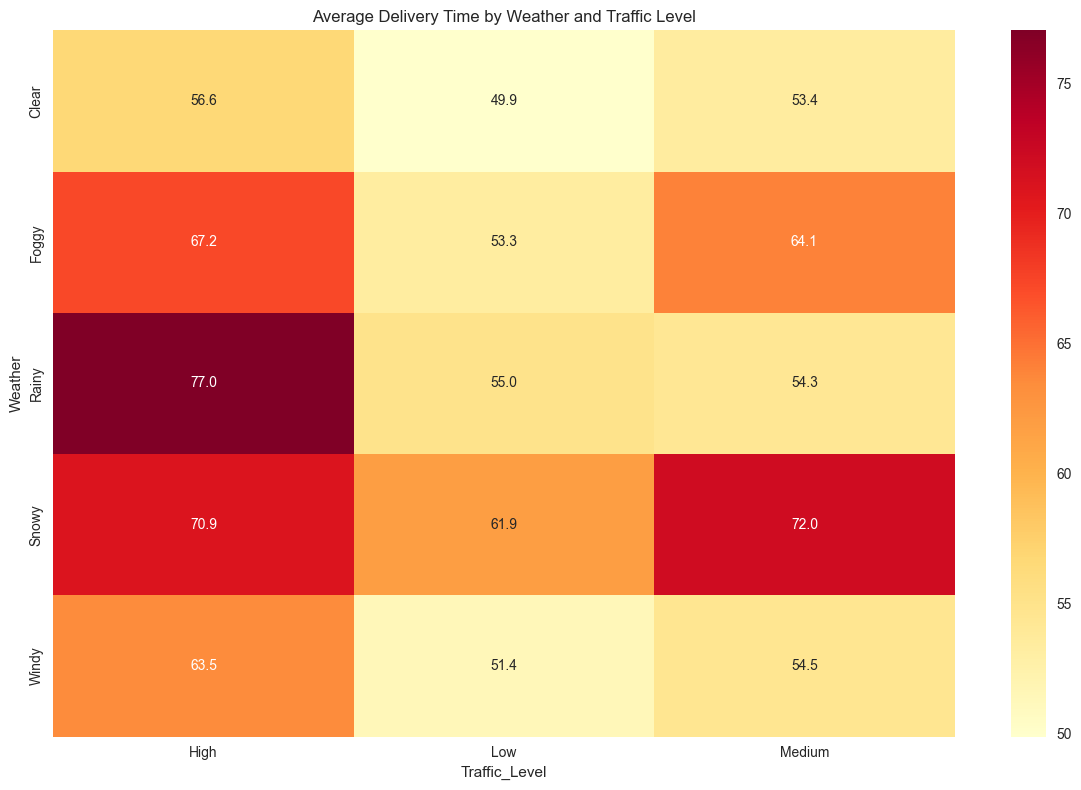

Weather + Traffic Interaction:
Traffic_Level       High        Low     Medium
Weather                                       
Clear          56.602410  49.875706  53.440415
Foggy          67.238095  53.340426  64.088235
Rainy          77.045455  55.037500  54.297297
Snowy          70.900000  61.931818  71.966667
Windy          63.478261  51.384615  54.477273


In [18]:
# Weather + Traffic interaction
if 'Weather' in df.columns and 'Traffic_Level' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Pivot table for heatmap
    weather_traffic = df.pivot_table(values='Delivery_Time_min', 
                                   index='Weather', 
                                   columns='Traffic_Level', 
                                   aggfunc='mean')
    
    sns.heatmap(weather_traffic, annot=True, cmap='YlOrRd', fmt='.1f')
    plt.title('Average Delivery Time by Weather and Traffic Level')
    plt.tight_layout()
    plt.show()
    
    print("Weather + Traffic Interaction:")
    print(weather_traffic)

## 9. Feature Engineering Insights

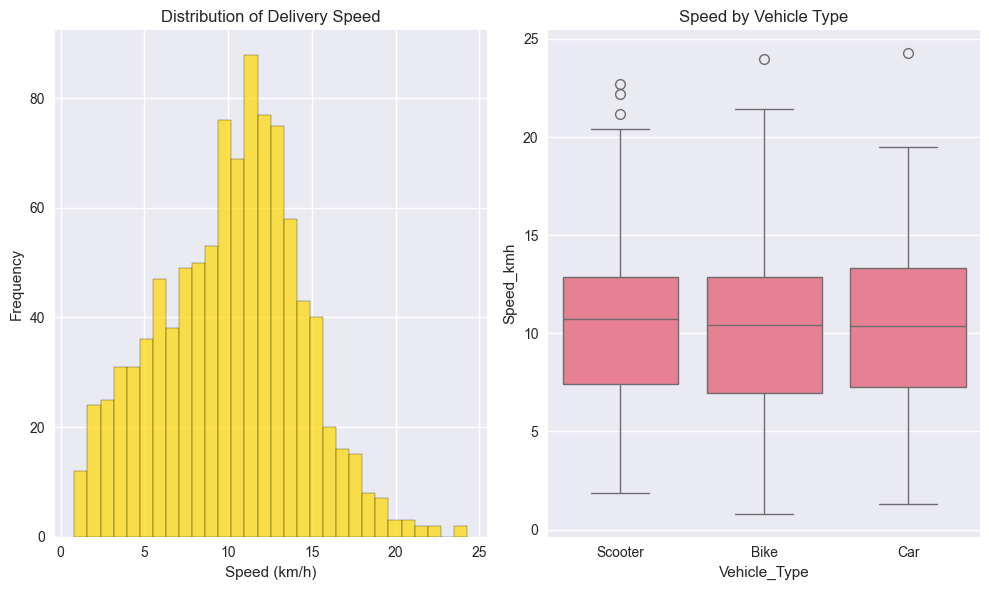

Average delivery speed: 10.16 km/h
Speed statistics:
count    1000.000000
mean       10.156880
std         4.209102
min         0.816000
25%         7.197414
50%        10.521877
75%        12.907123
max        24.262500
Name: Speed_kmh, dtype: float64


In [19]:
# Create potential new features for analysis
df_analysis = df.copy()

# Speed calculation (if distance and time are available)
if 'Distance_km' in df.columns:
    df_analysis['Speed_kmh'] = (df_analysis['Distance_km'] / df_analysis['Delivery_Time_min']) * 60
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df_analysis['Speed_kmh'], bins=30, alpha=0.7, color='gold', edgecolor='black')
    plt.title('Distribution of Delivery Speed')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    if 'Vehicle_Type' in df.columns:
        sns.boxplot(data=df_analysis, x='Vehicle_Type', y='Speed_kmh')
        plt.title('Speed by Vehicle Type')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Average delivery speed: {df_analysis['Speed_kmh'].mean():.2f} km/h")
    print(f"Speed statistics:")
    print(df_analysis['Speed_kmh'].describe())

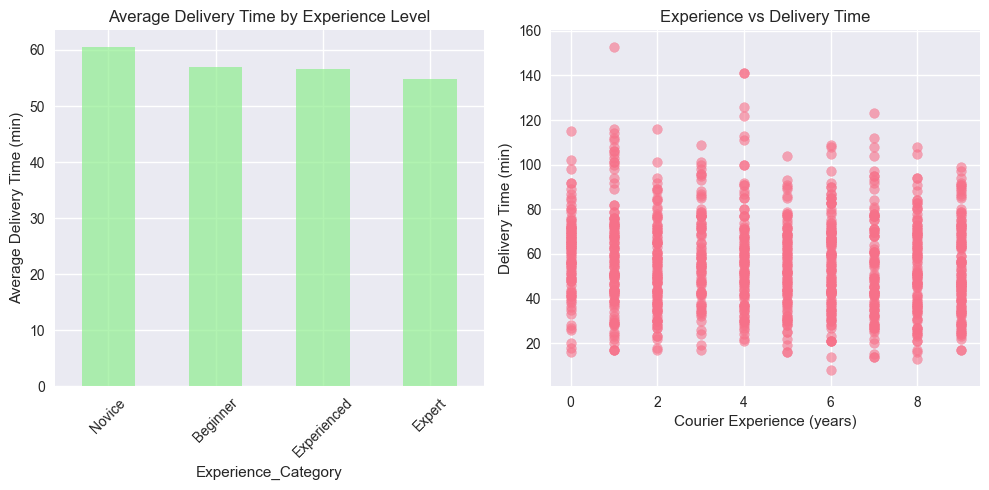

Experience Impact Analysis:
                          mean        std  count
Experience_Category                             
Novice               60.485981  26.205777    107
Beginner             57.011173  20.836169    179
Experienced          56.668478  22.882782    184
Expert               54.904645  21.641196    409


In [20]:
# Experience impact analysis
if 'Courier_Experience_yrs' in df.columns:
    # Create experience categories
    df_analysis['Experience_Category'] = pd.cut(df_analysis['Courier_Experience_yrs'], 
                                              bins=[0, 1, 3, 5, float('inf')], 
                                              labels=['Novice', 'Beginner', 'Experienced', 'Expert'])
    
    exp_analysis = df_analysis.groupby('Experience_Category')['Delivery_Time_min'].agg(['mean', 'std', 'count'])
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    exp_analysis['mean'].plot(kind='bar', alpha=0.7, color='lightgreen')
    plt.title('Average Delivery Time by Experience Level')
    plt.ylabel('Average Delivery Time (min)')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.scatter(df_analysis['Courier_Experience_yrs'], df_analysis['Delivery_Time_min'], alpha=0.6)
    plt.xlabel('Courier Experience (years)')
    plt.ylabel('Delivery Time (min)')
    plt.title('Experience vs Delivery Time')
    
    plt.tight_layout()
    plt.show()
    
    print("Experience Impact Analysis:")
    print(exp_analysis)

## 10. Key Findings Summary

In [21]:
print("=== KEY EDA FINDINGS ===")
print()

# Statistical summary
print("1. TARGET VARIABLE (Delivery Time):")
print(f"   • Range: {df['Delivery_Time_min'].min():.1f} - {df['Delivery_Time_min'].max():.1f} minutes")
print(f"   • Mean: {df['Delivery_Time_min'].mean():.1f} ± {df['Delivery_Time_min'].std():.1f} minutes")
print(f"   • Distribution: {'Right-skewed' if df['Delivery_Time_min'].skew() > 0 else 'Left-skewed'}")
print()

# Feature importance insights
if 'Distance_km' in df.columns:
    distance_corr = df['Distance_km'].corr(df['Delivery_Time_min'])
    print(f"2. DISTANCE IMPACT:")
    print(f"   • Correlation with delivery time: {distance_corr:.3f}")
    print(f"   • Average speed: {df_analysis['Speed_kmh'].mean():.1f} km/h")
print()

# Categorical features insights
if 'Weather' in df.columns:
    weather_impact = df.groupby('Weather')['Delivery_Time_min'].mean()
    worst_weather = weather_impact.idxmax()
    best_weather = weather_impact.idxmin()
    print(f"3. WEATHER IMPACT:")
    print(f"   • Worst conditions: {worst_weather} ({weather_impact[worst_weather]:.1f} min avg)")
    print(f"   • Best conditions: {best_weather} ({weather_impact[best_weather]:.1f} min avg)")
print()

if 'Traffic_Level' in df.columns:
    traffic_impact = df.groupby('Traffic_Level')['Delivery_Time_min'].mean()
    print(f"4. TRAFFIC IMPACT:")
    for level in traffic_impact.index:
        print(f"   • {level}: {traffic_impact[level]:.1f} min average")
print()

# Data quality
missing_pct = (df.isnull().sum() / len(df) * 100)
print(f"5. DATA QUALITY:")
print(f"   • Dataset size: {len(df):,} records")
if missing_pct.sum() > 0:
    print(f"   • Missing values: {missing_pct[missing_pct > 0].to_dict()}")
else:
    print(f"   • No missing values detected")

# Outliers summary
outliers_delivery, _, _ = detect_outliers_iqr(df, 'Delivery_Time_min')
outlier_pct = len(outliers_delivery) / len(df) * 100
print(f"   • Outliers in delivery time: {outlier_pct:.1f}%")

=== KEY EDA FINDINGS ===

1. TARGET VARIABLE (Delivery Time):
   • Range: 8.0 - 153.0 minutes
   • Mean: 56.7 ± 22.1 minutes
   • Distribution: Right-skewed

2. DISTANCE IMPACT:
   • Correlation with delivery time: 0.781
   • Average speed: 10.2 km/h

3. WEATHER IMPACT:
   • Worst conditions: Snowy (67.1 min avg)
   • Best conditions: Clear (53.1 min avg)

4. TRAFFIC IMPACT:
   • High: 64.8 min average
   • Low: 52.9 min average
   • Medium: 56.0 min average

5. DATA QUALITY:
   • Dataset size: 1,000 records
   • Missing values: {'Weather': 3.0, 'Traffic_Level': 3.0, 'Time_of_Day': 3.0, 'Courier_Experience_yrs': 3.0}
   • Outliers in delivery time: 0.6%


In [ ]:
# Close the database connection
conn.close()
print("Database connection closed.")